<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_14_Notebook_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Agentes**
---



**Agentes** são componentes que usam cadeias (*chains*) para interagir com o ambiente, tomar decisões e realizar ações com base em entradas dinâmicas. Eles funcionam como controladores que orquestram o comportamento de diferentes partes do sistema, utilizando modelos de linguagem, ferramentas (*tools*) externas e cadeias personalizadas para cumprir uma tarefa específica.

**Principais Características dos Agentes no LangChain:**

* **Tomada de Decisões Dinâmica**: ao contrário de uma cadeia estática, que segue um fluxo pré-definido, **agentes** podem tomar decisões sobre quais ações realizar ou quais ferramentas utilizar, dependendo das entradas que recebem e dos resultados intermediários.

* **Integração com Ferramentas**: agentes podem ser configurados para interagir com ferramentas externas, como APIs, bancos de dados, navegadores web, entre outros. Isso permite que o agente realize tarefas complexas que exigem interação com sistemas externos.

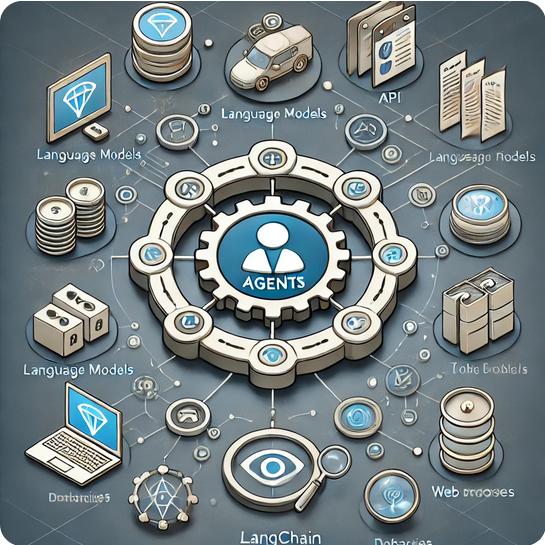

Os **agentes** permitem que o modelo use as ferramentas de forma iterativa, decidindo quantas vezes e em que ordem usá-las durante o processo.

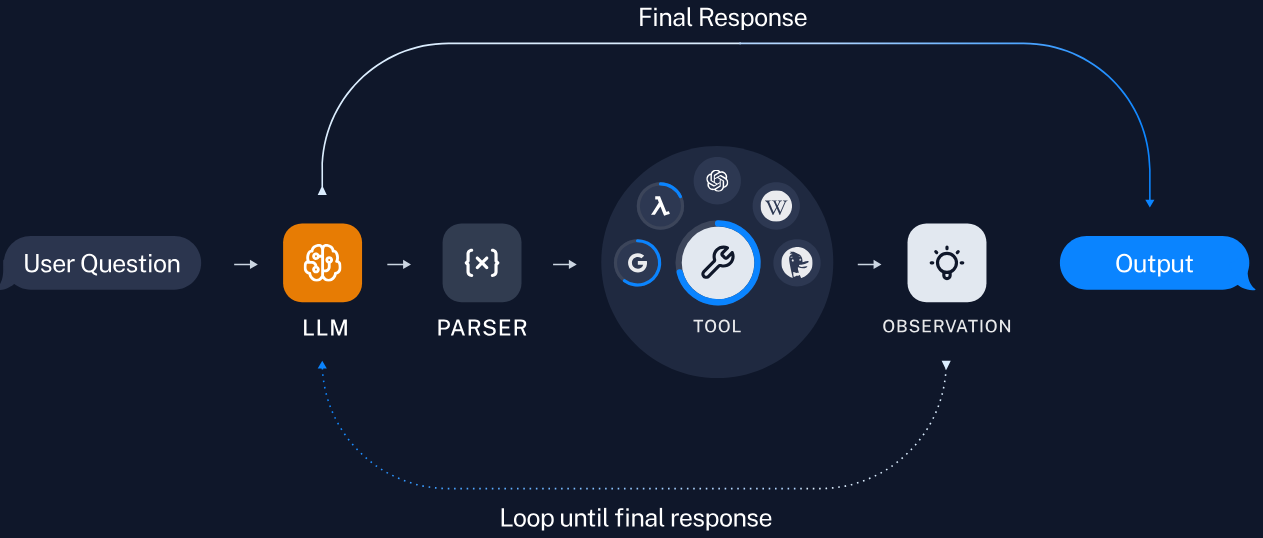

**IMPORTANTE:**

Por si só, modelos de linguagem não podem realizar ações - eles apenas geram texto.
>
Um grande caso de uso do **LangChain** é a criação de agentes. **Agentes** são sistemas que usam um LLM como motor de raciocínio para determinar quais ações tomar e quais devem ser as entradas para essas ações. Os resultados dessas ações podem então ser reinseridos no agente, que decide se mais ações são necessárias ou se pode finalizar.

#### **LangChain**

In [ ]:
#@title Instalando o pacote LangChain
!pip install -qU langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 857.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 3.6 MB/s eta 0:00:00


In [ ]:

import langchain

print(langchain.__version__)

0.2.13


In [ ]:
#@title Integração com o pacote da OpenAI

!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


In [ ]:

#@title Definindo a chave da API da OpenAI

import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


#### **Exemplos**

In [ ]:
!pip install -qU langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.2 MB/s eta 0:00:00


**LangGraph** é uma biblioteca projetada para criar aplicações complexas e com estado, que envolvem múltiplos componentes interativos, ou “atores”, usando grandes modelos de linguagem (LLMs). Ela é construída sobre o framework **LangChain** e se concentra em criar aplicações que podem lidar com múltiplos passos computacionais de forma cíclica. Isso é especialmente útil para aplicações que exigem comportamentos semelhantes a agentes, em que o modelo precisa decidir a próxima ação em um loop.

Imagine o **LangGraph** como um diretor de teatro, onde cada ator (componente da sua aplicação) tem um papel específico. Este diretor pode coordenar esses atores, decidindo quem executa qual ação e quando, com base no roteiro (os dados de entrada e os passos computacionais). A natureza cíclica do **LangGraph** significa que esta peça pode ser executada em loops, permitindo interações contínuas e tomada de decisões, muito como uma conversa em andamento em que cada resposta depende da anterior.

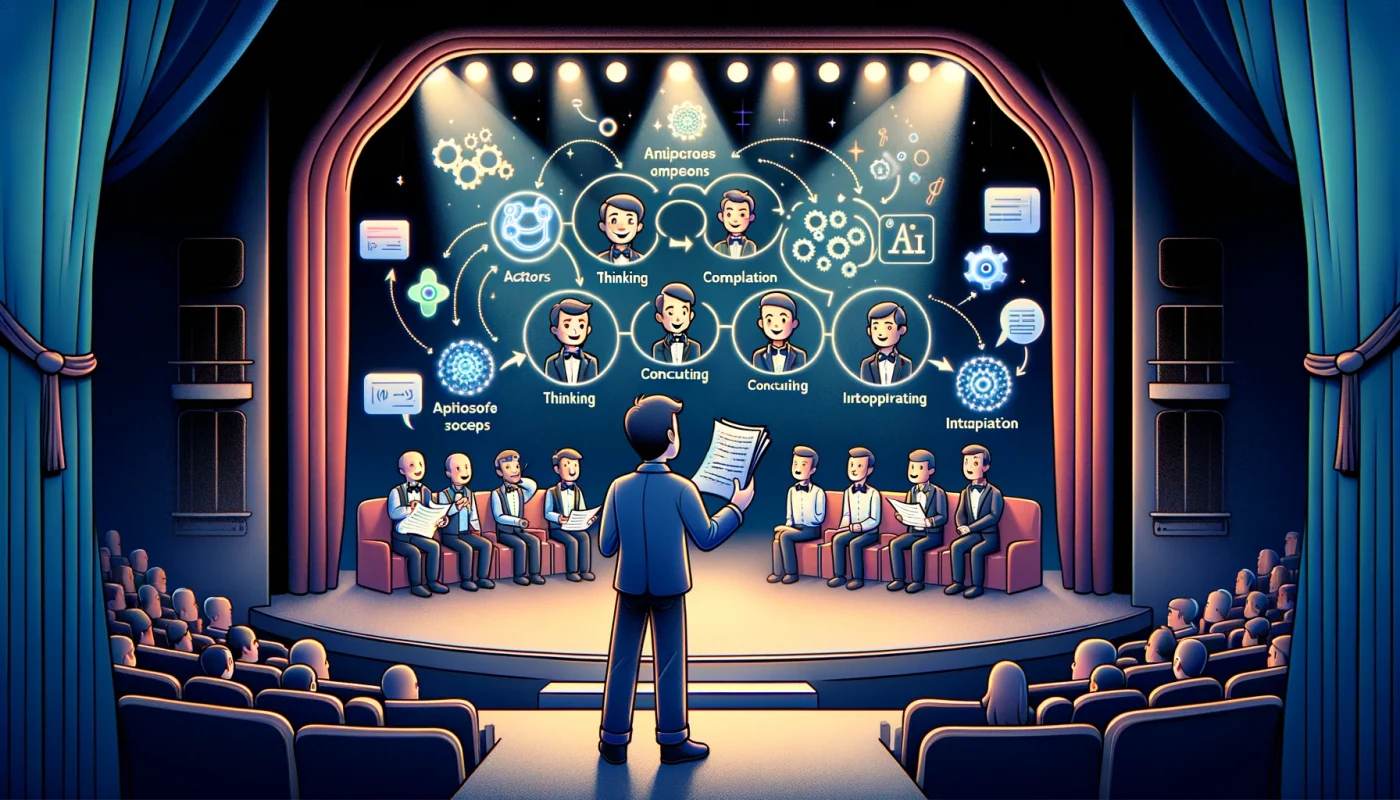

**LangGraph** estende as capacidades da `LangChain Expression Language` adicionando esses ciclos, importantes para aplicações que imitam comportamentos de agentes. Ao contrário dos frameworks tradicionais de Grafos Acíclicos Direcionados (DAG), **LangGraph** se especializa na criação de ciclos, oferecendo uma maneira mais dinâmica de lidar com interações complexas em aplicações de IA.

Primeiro, definiremos um modelo e uma ferramenta, e então usaremos esses para criar um agente.

In [ ]:
from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
from langchain_core.tools import tool

@tool
def funcao_magica(entrada: int) -> int:
    """Aplica uma função mágica a uma entrada."""
    return entrada + 2

ferramentas = [funcao_magica]

consulta = "qual é o valor de funcao_magica(3)?"

Para o `AgentExecutor`, definimos um *prompt* com um espaço reservado para a área de rascunho do agente (`agent_scratchpad`).

In [ ]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Você é um assistente útil"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

O agente pode ser invocado da seguinte forma:

In [ ]:
agente = create_tool_calling_agent(modelo, ferramentas, prompt)

agente_executor = AgentExecutor(agent=agente, tools=ferramentas)

agente_executor.invoke({"input": consulta})

{'input': 'qual é o valor de funcao_magica(3)?',
 'output': 'O valor de `funcao_magica(3)` é 5.'}

O **executor do agente `react`** gerencia um estado que é definido por uma lista de mensagens. Ele continuará a processar a lista até que não haja mais chamadas de ferramentas na saída do agente. Para iniciar, fornecemos uma lista de mensagens. A saída conterá o estado completo — neste caso, o histórico da conversa.

In [ ]:
from langgraph.prebuilt import create_react_agent

app = create_react_agent(modelo, ferramentas)

resposta = app.invoke({"messages": [("human", consulta)]})
#{
#    "input": consulta,
#    "output": mensagens["messages"][-1].content,
#}

In [ ]:
resposta

{'messages': [HumanMessage(content='qual é o valor de funcao_magica(3)?', id='b8167b62-6af3-4e08-98e6-18f2bbd069b2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_IznosqH5PQgrEi0OA4rqjU6d', 'function': {'arguments': '{"entrada":3}', 'name': 'funcao_magica'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 61, 'total_tokens': 77}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-fa2938af-b286-4237-8d54-e1fb6c4df9ff-0', tool_calls=[{'name': 'funcao_magica', 'args': {'entrada': 3}, 'id': 'call_IznosqH5PQgrEi0OA4rqjU6d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 61, 'output_tokens': 16, 'total_tokens': 77}),
  ToolMessage(content='5', name='funcao_magica', id='803c88f7-3f9e-46ac-aca1-21ea0966124c', tool_call_id='call_IznosqH5PQgrEi0OA4rqjU6d'),
  AIMessage(content='O valor de `funcao_magica(3)` é 

In [ ]:
resposta["messages"][-1].content

'O valor de `funcao_magica(3)` é 5.'

In [ ]:
mensagens_historico = resposta["messages"]

nova_consulta = "Não entendi!"

mensagens = app.invoke({"messages": mensagens_historico + [("human", nova_consulta)]})
{
    "input": nova_consulta,
    "output": mensagens["messages"][-1].content,
}

{'input': 'Não entendi!',
 'output': 'A função mágica que você perguntou, `funcao_magica(3)`, retorna o valor 5 quando você fornece o número 3 como entrada. Se precisar de mais explicações sobre como essa função funciona ou o que ela faz, por favor, me avise!'}

Com os agentes legados do **LangChain**, é necessário fornecer um modelo de *prompt*. Você pode usar isso para controlar o agente.

Com o **executor do agente react** do **LangGraph**, por padrão, não há um *prompt*.

Vamos fornecer instruções personalizadas para fazer o agente responder em espanhol.

Primeiro, usando AgentExecutor:

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Você é um assistente útil. Responda apenas em espanhol."),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

agente = create_tool_calling_agent(modelo, ferramentas, prompt)
agente_executor = AgentExecutor(agent=agente, tools=ferramentas)

agente_executor.invoke({"input": consulta})

{'input': 'qual é o valor de funcao_magica(3)?',
 'output': 'El valor de funcao_magica(3) es 5.'}

Agora, vamos fornecer uma mensagem de sistema personalizada ao **executor de agente react**.

O `create_react_agent` predefinido do **LangGraph** não aceita um modelo de *prompt* diretamente como parâmetro, mas sim um parâmetro `state_modifier`.

In [ ]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import create_react_agent

mensagem_sistema = "Você é um assistente útil. Responda apenas em espanhol."

app = create_react_agent(modelo, ferramentas, state_modifier = mensagem_sistema)

app.invoke({"messages": [("user", consulta)]})

{'messages': [HumanMessage(content='qual é o valor de funcao_magica(3)?', id='33575de3-d0d4-4773-b1f9-211b61ac2f6f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_IuJ0JHOo3rRPTOOD144Lfzvd', 'function': {'arguments': '{"entrada":3}', 'name': 'funcao_magica'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 75, 'total_tokens': 91}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-57148e35-c691-4519-a626-bfc38c304ce8-0', tool_calls=[{'name': 'funcao_magica', 'args': {'entrada': 3}, 'id': 'call_IuJ0JHOo3rRPTOOD144Lfzvd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 75, 'output_tokens': 16, 'total_tokens': 91}),
  ToolMessage(content='5', name='funcao_magica', id='061b8e21-564d-4f29-b420-779996b3b7eb', tool_call_id='call_IuJ0JHOo3rRPTOOD144Lfzvd'),
  AIMessage(content='El valor de funcao_magica(3) es 

Vamos ver outro exemplo:

In [ ]:
from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
from langchain_core.tools import tool

@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int

@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent

ferramentas = [multiply, add, exponentiate]

In [ ]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import create_react_agent

consulta = "Faça 3 elevado à quarta potência e multiplique pela soma de sete e três e, em seguida, eleve ao quadrado o resultado total"

app = create_react_agent(modelo, ferramentas)

resposta = app.invoke({"messages": [("user", consulta)]})

In [ ]:
resposta

{'messages': [HumanMessage(content='Faça 3 elevado à quarta potência e multiplique pela soma de sete e três e, em seguida, eleve ao quadrado o resultado total', id='7f4aa235-2a61-4678-b146-338e9cccc79b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_WUYbqNnybG4EpNVaJjFiofEB', 'function': {'arguments': '{"base": 3, "exponent": 4}', 'name': 'exponentiate'}, 'type': 'function'}, {'id': 'call_EbXk0HLPLEAyKMewFevGEm3o', 'function': {'arguments': '{"first_int": 7, "second_int": 3}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 127, 'total_tokens': 182}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5e67997c-72cb-4b25-9154-f564c1ab462a-0', tool_calls=[{'name': 'exponentiate', 'args': {'base': 3, 'exponent': 4}, 'id': 'call_WUYbqNnybG4EpNVaJjFiofEB', 'type': 'tool_call'}, {'name': 'add', 'arg

In [ ]:
len(resposta["messages"])

9

In [ ]:
resposta["messages"][0].content

'Faça 3 elevado à quarta potência e multiplique pela soma de sete e três e, em seguida, eleve ao quadrado o resultado total'

In [ ]:
resposta["messages"][0].type

'human'

In [ ]:
for msg in resposta["messages"]:
    print(msg)

content='Faça 3 elevado à quarta potência e multiplique pela soma de sete e três e, em seguida, eleve ao quadrado o resultado total' id='7f4aa235-2a61-4678-b146-338e9cccc79b'
content='' additional_kwargs={'tool_calls': [{'id': 'call_WUYbqNnybG4EpNVaJjFiofEB', 'function': {'arguments': '{"base": 3, "exponent": 4}', 'name': 'exponentiate'}, 'type': 'function'}, {'id': 'call_EbXk0HLPLEAyKMewFevGEm3o', 'function': {'arguments': '{"first_int": 7, "second_int": 3}', 'name': 'add'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 127, 'total_tokens': 182}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-5e67997c-72cb-4b25-9154-f564c1ab462a-0' tool_calls=[{'name': 'exponentiate', 'args': {'base': 3, 'exponent': 4}, 'id': 'call_WUYbqNnybG4EpNVaJjFiofEB', 'type': 'tool_call'}, {'name': 'add', 'args': {'first_int': 7, 'second_int': 3}, 'id': '

In [ ]:
for msg in resposta["messages"]:
    print(msg.type)

human
ai
tool
tool
ai
tool
ai
tool
ai


In [ ]:
for msg in resposta["messages"]:
    print(msg.content)

Faça 3 elevado à quarta potência e multiplique pela soma de sete e três e, em seguida, eleve ao quadrado o resultado total

81
10

810

656100
O resultado de \(3\) elevado à quarta potência, multiplicado pela soma de \(7\) e \(3\), e em seguida elevado ao quadrado é \(656100\).


## **Referências**

> https://python.langchain.com/v0.2/docs/how_to/migrate_agent/

>